<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introdução-ao-Cenário" data-toc-modified-id="Introdução-ao-Cenário-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introdução ao Cenário</a></span><ul class="toc-item"><li><span><a href="#Pool-de-Ideias" data-toc-modified-id="Pool-de-Ideias-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pool de Ideias</a></span></li><li><span><a href="#Bibliotecas-Utilizadas" data-toc-modified-id="Bibliotecas-Utilizadas-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bibliotecas Utilizadas</a></span></li><li><span><a href="#Variáveis-do-Projeto" data-toc-modified-id="Variáveis-do-Projeto-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Variáveis do Projeto</a></span></li></ul></li><li><span><a href="#Leitura-dos-Sinais" data-toc-modified-id="Leitura-dos-Sinais-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Leitura dos Sinais</a></span><ul class="toc-item"><li><span><a href="#Taxa-de-Amostragem" data-toc-modified-id="Taxa-de-Amostragem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Taxa de Amostragem</a></span></li><li><span><a href="#Analisando-os-Sinais" data-toc-modified-id="Analisando-os-Sinais-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analisando os Sinais</a></span></li><li><span><a href="#Duração-dos-Sinais" data-toc-modified-id="Duração-dos-Sinais-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Duração dos Sinais</a></span></li><li><span><a href="#Visualizando-os-Sinais" data-toc-modified-id="Visualizando-os-Sinais-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizando os Sinais</a></span></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Extraction</a></span><ul class="toc-item"><li><span><a href="#Domínio-do-Tempo" data-toc-modified-id="Domínio-do-Tempo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Domínio do Tempo</a></span><ul class="toc-item"><li><span><a href="#Envelope-de-Amplitude" data-toc-modified-id="Envelope-de-Amplitude-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Envelope de Amplitude</a></span></li><li><span><a href="#Root-Mean-Squared-Energy" data-toc-modified-id="Root-Mean-Squared-Energy-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Root Mean Squared Energy</a></span></li><li><span><a href="#Zero-Crossing-Rate" data-toc-modified-id="Zero-Crossing-Rate-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Zero Crossing Rate</a></span></li></ul></li></ul></li></ul></div>

Este notebook tem por objetivo propor uma visão clara sobre sinais de áudio e suas características, dentro do contexto relacionado ao projeto **Voice Unlocker** que, por sua vez, refere-se a construção de uma inteligência capaz de reconhecer interlocutores e acionar dispositivos eletrônicos a partir da voz. O desenvolvimento do código e das análises teóricas a seguir faz parte do trabalho de graduação do curso de Engenharia de Informação, oferecido pela Universidade Federal do ABC.

<img src="https://i.imgur.com/Mlc4aW6.png" alt="voice-unlocker logo">

Em uma visão geral, o projeto **Voice Unlocker** pretende aplicar o conceito de _speaker verification_ ou _speaker detection_ para utilizar a voz de interlocutores em sua identificação. Dessa forma, é imprescindívei que se tenha conhecimentos relevantes a respeito de sinais de áudio, desde a sua formação até formas de extrair _features_ para caracterízação dos sinais. Para isso, será utilizado o Python como linguagem principal de programação, além de bibliotecas construídas com ricas abordagens e funcionalidades nesse meio como, por exemplo, a biblioteca `librosa`. Eventualmente, serão utilizados modelos de Machine Learning propostos pela biblioteca `sklearn` para o treinamento de modelos de classificação supervisionada. Em outra vertente ainda a ser estudada, também será possível utilizar frameworks de Deep Learning, como `keras` e `TensorFlow`, para treinar Redes Neurais capazes de realizar todo o processo de extração de features de forma automática de modo a reconhecer interlocutores.

# Introdução ao Cenário

Para a realização do processo de extração de features, foram coletados três sinais de áudio de três interlocutores distintos. À todos, foi solicitado a pronunícia da frase: "Abra a porta". De acordo com suas características vocais, os interlocutores pronunciaram a frase e gravaram o conteúdo para utilização posterior.

> 📌**Nota**: os sinais de áudio a serem lidos neste documento fazem parte de um teste inicial onde três diferentes interlocutores pronunciaram uma mesma frase específica para futuras análises comparativas. Assim, as amostras são compostas por:
* **_Interlocutor 01_**: áudio de 2 segundos e com 5,5kB
* **_Interlocutor 02_**: áudio de 1 segundo e com 3,5kB
* **_Interlocutor 03_**: áudio de 3 segundos e com 6,7kB

<div class="alert alert-block alert-info">
<b>Observação:</b> As amostras de áudio utilizadas neste notebook foram gravadas via WhatsApp através de um equipamento celular <code>moto g(6) plus</code> com Android versão 9 (PPW29.116-16-29). As gravações foram realizadas e enviadas a um contato específico na plataforma para posteriormente serem baixadas em formato .ogg no sistema operacional de trabalho.
</div>

## Pool de Ideias

___
`[IDEIA 01]` para desenvolvimento de rotina (script) no whatsapp para realizar o download rotineiro de arquivos de um determinado grupo. Dessa forma, seria possível:
1. Criar um grupo no whatsapp específico para cada interlocutor;
2. Combinar com os interlocutores que enviem mensagens de áudio rotineiramente para grupos individuais
3. Rodar (ou deixar rodando) script que realiza o download destes sinais

`[IDEIA 02]` criar uma função pra ler sinais de áudio e transformar os dados em um pandas DataFrame. A ideia é gerar uma base de dados com as principais informações do áudio em formato tabular.

`[IDEIA 03]` testar simulações em vida real, analisando erros de reconhecimento com outras pessoas pronunciando frases ou mesmo possíveis erros em pessoas não habilitadas utilizando gravações de pessoas habilitadas pra tentar burlar o sistema.
___

## Bibliotecas Utilizadas

In [3]:
# Importando bibliotecas
import librosa
import librosa.display as ld
import IPython.display as ipd
import matplotlib.pyplot as plt
from warnings import filterwarnings
import os
import numpy as np
import scipy as sp

filterwarnings('ignore')
%matplotlib inline

## Variáveis do Projeto

In [56]:
# Definindo variáveis a serem utilizadas
DATA_PATH = '../data/samples'
A1_FILE = 'interlocutor01.ogg'
A2_FILE = 'interlocutor02.ogg'
A3_FILE = 'interlocutor03.ogg'

A1_PATH = os.path.join(DATA_PATH, A1_FILE)
A2_PATH = os.path.join(DATA_PATH, A2_FILE)
A3_PATH = os.path.join(DATA_PATH, A3_FILE)

SAMPLE_RATE = 22050
FRAME_SIZE = 1024
HOP_LENGTH = 512

COLORS = ['navy', 'seagreen', 'salmon']

# Leitura dos Sinais

Uma vez abordado todo o contexto do projeto e da geração dos sinais de áudio a serem utilizados na exploração, é possível agora utilizar a biblioteca `librosa` para ler e explorar o conteúdo dos arquivos armazenados.

In [6]:
# Verificando arquivos no diretório de áudios
print(f'Arquivos presentes no diretório de áudio: \n\n{os.listdir(DATA_PATH)}')

Arquivos presentes no diretório de áudio: 

['interlocutor03.ogg', 'interlocutor02.ogg', 'interlocutor01.ogg']


In [18]:
# Realizando a leitura dos sinais
y1, _ = librosa.load(A1_PATH)
y2, _ = librosa.load(A2_PATH)
y3, _ = librosa.load(A3_PATH)

# Analisando as dimensões retornadas
print(f'Dimensão do sinal y1: {y1.shape}')
print(f'Dimensão do sinal y2: {y2.shape}')
print(f'Dimensão do sinal y3: {y3.shape}')

Dimensão do sinal y1: (56889,)
Dimensão do sinal y2: (32634,)
Dimensão do sinal y3: (74088,)


A função [`load`](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.load.html) da biblioteca `librosa` realiza a leitura de um sinal de onda e retorna dois parâmetros: um sinal `y` com as amplitudes características e o elemento `sr` representando o _sample rate_ ou taxa de amostragem do sinal.

A sessão abaixo foi criada para propor um melhor entendimento sobre os elementos de retorno da função de leitura aplicada acima.

## Taxa de Amostragem

Até o momento atual, os sinais de áudio são entendidos como formas de onda geradas a partir do distúrbio de pressão das moléculas de ar geradas pela fala. Caracterizados como ondas mecânicas no meio analógico, tais sinais, ao serem tratados e analisados computacionalmente, necessitam de uma conversão analógico-digital. Somente assim, os elementos contínuos de amplitude e tempo são transformados em blocos discretos que podem ser analisados de modo a extrair características importantes para processos computacionais.

A *amostragem* é um procedimento capaz de coletar informações pontuais de _amostras_ de um sinal de áudio analógico e contínuo, gerando assim um sinal digital e discreto. Para sua efetividade, é preciso definir um parâmetro relacionado a frequência com que esses sinais pontuais são coletados: neste momento surge a _taxa de amostragem_ ou _sample rate_.

Na prática, a taxa de amostragem não pode ser escolhida de forma arbitrária, uma vez que deve representar uma transcrição fiel do sinal original de modo a evitar grandes perdas de informações durante o processo de conversão. Para definir, de fato, o melhor valor para essa taxa, é preciso considerar um conceito extremamente importante relacionado a _frequência de Nyquist_:


> 📌 **Torema de Nyquist-Shannon**: _"Seja um sinal, limitado em banda, e seu intervalo de tempo dividido em partes iguais, de forma que se obtenham intervalos tais que, cada subdivisão compreenda um intervalo com período $T$ segundos, onde $T$ é menor do que $f_m/2$, e se uma amostra instantânea é tomada arbitrariamente de cada subintervalo, então o conhecimento da amplitude instantânea de cada amostra somado ao conhecimento dos instantes em que é tomada a amostra de cada subintervalo contém toda a informação do sinal original."_


Sabe-se que o range de escuta do ser humano varia entre 20 a aproximadamente 20.000Hz e, portanto, elementos sonoros fora desse intervalo podem ser considerados imperceptíveis ao ouvido humano. Para que seja escolhida uma taxa de amostragem sem que haja perdas de sinais perceptíveis, é possível levar em consideração o teorema de Nyquist para definir esse parâmetro. 

Em diversas aplicações, são encontradas taxas de amostragens de 44100Hz ou 22050Hz, sendo o primeiro caso muito popular em análises musicais sem nenhuma perda de frequência perceptível, visto que $f_N = \frac{s_r}{2} = 22050$ supera o limiar humano. Em estudos relacionados a reconhecimento de voz, taxas de amostragem de 22050Hz são popularmente usadas por reservar espaço sem perdas significantes.

Links de referência:

https://pt.wikipedia.org/wiki/Teorema_da_amostragem_de_Nyquist%E2%80%93Shannon

https://manual.audacityteam.org/man/sample_rates.html

## Analisando os Sinais

Uma vez entendido o conceito por trás da _amostragem_ de um sinal analógico para que uma análise digital possa ser feita, é possível utilizar o _widget_ importado do módulo `IPython.display` para literalmente escutar os sinais de áudio lidos.

In [19]:
# Áudio 01
ipd.Audio(A1_PATH)

In [20]:
# Áudio 02
ipd.Audio(A2_PATH)

In [21]:
# Áudio 03
ipd.Audio(A3_PATH)

Sobre os interlocutores, é possível pontuar as seguintes informações prévias:
* **_Interlocutor 1_**: gênero masculino entre 25 e 30 anos;
* **_Interlocutor 2_**: gênero masculino entre 60 e 65 anos;
* **_Interlocutor 3_**: gênero feminino entre 55 e 60 anos.

As características de gênero e idade do interlocutor trazem uma ideia interessante a respeito da identificação dos mesmos. É possível analisar, com essas informações prévias, os sinais sobre uma outra ótica, associando os elementos perceptíveis e comparando os cenários opostos de gênero e idade. Entretanto, computacionalmente falando, a construção de uma inteligência capaz de reconhecer interlocutores vai muito além da extração de gênero e idade de um sinal de entrada. Além disso, na prática, tais informações são intrínsecas ao próprio interlocutor e, em muitos casos, não são acessíveis ou informadas previamente.

No decorrer desse notebook, serão pontuadas algumas _features_ a serem extraídas de sinais de áudio com o objetivo de caracterizar e propor uma diferenciação clara dos mesmos.

## Duração dos Sinais

Realizando uma experiência intuitiva, é proposto o cálculo de duração de cada um dos sinais lidos a partir da quantidade de amostras e a taxa de amostragem. Ao realizar a leitura dos sinais, foram analisads as dimensões de cada um deles, sendo este um parâmetro que representa, na prática, a quantidade de amostras (amplitudes, no domínio do tempo) em cada áudio. Possuindo o total de amostras e a taxa de amostragem (amostras por segundo), é possível calcular a duração total de cada um deles com:

$$d_r = \frac{\text{len(signal)}}{s_r}$$

Onde `len(signal)` representa o total de amostras do sinal e $s_r$ representa a taxa de amostragem. A fração $\frac{1}{s_r}$ indica a duração, em segundos, de uma única amostra do sinal lido com a referida taxa de amostragem. Ao multiplicar esse fator pelo total de amostras, tem-se então a duração total do sinal.

In [25]:
# Calculando a duração dos sinais
d1 = len(y1) / SAMPLE_RATE
d2 = len(y2) / SAMPLE_RATE
d3 = len(y3) / SAMPLE_RATE

print(f'Duração do sinal y1: {d1} segundos')
print(f'Duração do sinal y2: {d2} segundos')
print(f'Duração do sinal y3: {d3} segundos')

Duração do sinal y1: 2.58 segundos
Duração do sinal y2: 1.48 segundos
Duração do sinal y3: 3.36 segundos


Adicionalmente, é possível utilizar a função `librosa.get_duration()` para retornar a duração de cada um dos sinais já lidos anteriormente.

In [28]:
# Utilizando librosa
d1 = librosa.get_duration(y1)

print(f'Duração do sinal y1 (via librosa): {d1} segundos')

Duração do sinal y1 (via librosa): 2.58 segundos


## Visualizando os Sinais

Após um completo entendimento prévio sobre os sinais de áudio, sendo estes lidos pela biblioteca `librosa` e mostrados através do módulo `IPython.display`, é chegado o momento de visualizar graficamente os sinais no domínio do tempo. Para isso, será utilizado o módulo `librosa.display` importando previamente para analisar as amplitudes `y` de cada sinal ao longo do tempo.

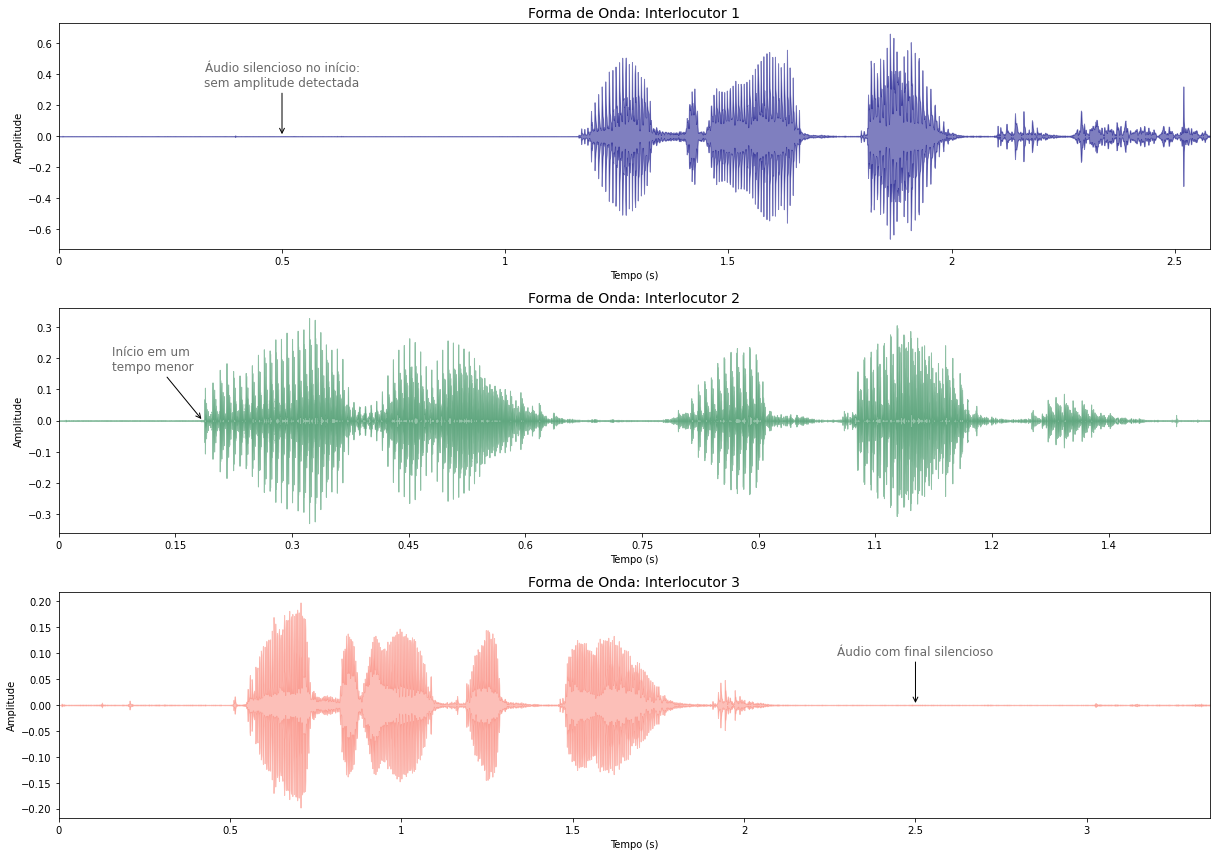

In [51]:
# Criando figura de plotagem
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 12))

# Plotando ondas
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0], color=COLORS[0], alpha=.5)
ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1], color=COLORS[1], alpha=.5)
ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2], color=COLORS[2], alpha=.5)

# Customizando plotagem
for ax, i in zip(axs, range(1, 4)):
    ax.set_title(f'Forma de Onda: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude')

# Anotações
axs[0].annotate(f'Áudio silencioso no início:\nsem amplitude detectada', (0.5, 0.0), xytext=(0,50), 
             textcoords='offset points', size=12, #bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='->', fc='w'), color='dimgrey', ha='center')
axs[1].annotate(f'Início em um \ntempo menor', (0.185, 0.0), xytext=(-50,50), 
             textcoords='offset points', size=12, #bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='->', fc='w'), color='dimgrey', ha='center')
axs[2].annotate(f'Áudio com final silencioso', (2.5, 0.0), xytext=(0,50), 
             textcoords='offset points', size=12, #bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='->', fc='w'), color='dimgrey', ha='center')   

plt.tight_layout()

Os gráficos acima, evidenciando as formas de onda no domínio do tempo, são de grande importância para o entendimento dos sinais sonoros. A partir deles, é possível analisar graficamente o que foi mostrado anteriormente pelo widget do módulo `IPython.display`.

Em uma visão geral, é possível analisar, por exemplo, que o primeiro interlocutor gravou um sinal silencioso no início. Já o segundo interlocutor iniciou rapidamente a fala, gerando um sinal de duração mais baixa. O terceiro interlocutor demorou a finalizar a gravação, gerando assim um áudio de final silencioso. Além disso, é possível analisar as características de onda presentes em cada um dos três sinais.

Para propor uma análise ainda mais rica, a figura abaixo normaliza os eixos e traz todas três formas de onda em um único local.

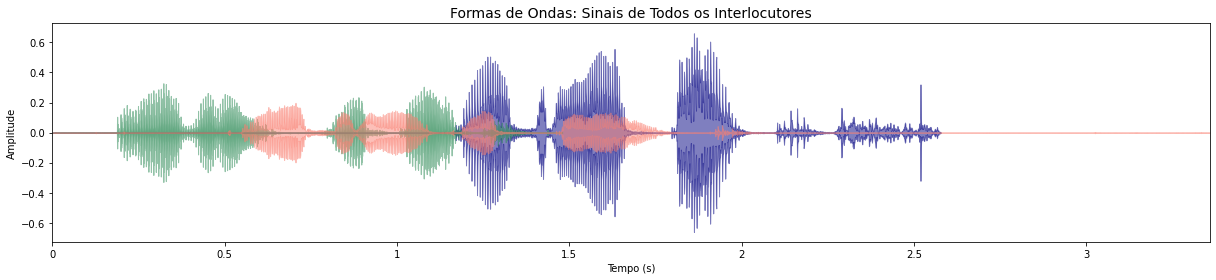

In [53]:
# Plotando todos os sinais em um mesmo eixo
fig, ax = plt.subplots(figsize=(17, 4))
ld.waveplot(y1, sr=SAMPLE_RATE, ax=ax, color=COLORS[0], alpha=.5)
ld.waveplot(y2, sr=SAMPLE_RATE, ax=ax, color=COLORS[1], alpha=.5)
ld.waveplot(y3, sr=SAMPLE_RATE, ax=ax, color=COLORS[2], alpha=.5)

ax.set_title(f'Formas de Ondas: Sinais de Todos os Interlocutores', size=14)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude')
plt.tight_layout()

Apesar de observar detalhes antes impercetíveis, ainda sim existem poucos elementos capazes de descrever os sinais de forma relevante. Nas próximas sessões, será proposto uma visão geral sobre as principais features a serem extráidas dos sinais e, na sequência, a extração propriamente dita.

# Feature Extraction

Após uma eficiente jornada na leitura, entendimento e análise inicial em sinais de áudio, é preciso dar um passo adicional no detalhamento destes sinais de modo a propor construções mais arrojadas visando a identificação de interlocutores. Nesta etapa do projeto, serão colocados em pauta tópicos relacionados a _extração de features_ dos sinais, sendo estas responsáveis por caracterizar e definir elementos importantes sobre os mesmos.

Como passo inicial, é preciso ter uma visão geral sobre algumas das principais _features_ a serem extraídas de um sinal sonoro. Basicamente, em aplicações relacionadas a áudio, é feita uma categorização das features em termos de domínio, gerando assim três grandes grupos:

* **_Domínio do Tempo_**: características do sinal extraídas no domínio do tempo
    * Envelope de amplitude;
    * Energia média quadrática;
    * Zero crossing rate.
    
    
* **_Domínio da Frequência_**: características do sinal extraídas no domínio da frequência
    * Energia de banda;
    * Centroid espectral;
    * Fluxo espectral.
    
    
* **_Domínio de Tempo-Frequência_**: características extraídas dos domínios do tempo e frequência em conjunto
    * Espectrogramas;
    * Mel-espectrogramas;
    * Constant-Q transform.
    
Nessa sessão, serão propostas análises mais detalhadas sobre as features presentes em cada um dos domínios acima citados, facilitando assim o entendimento das aplicações e de suas formas de extração, sendo estas compostas por ferramentas prontas (`librosa`) ou implementações próprias.

## Domínio do Tempo

As features relacionadas ao domínio do tempo, como mencionado anteriormente, são extraídas a partir de características do sinal em seu comportamento temporal. Junto com as features presentes no domínio da frequência, formam um conjunto de características classificadas como _baixo nível de abstração_, ou seja, possuem apenas uma interpretabilidade computacional, não podendo ser relacionada a eventos humanamente interpretáveis ou perceptíveis.

Em outras palavras, calcular essas features significa trazer características importantes dos sinais interpretáveis apenas por algoritmos. Visualmente e analiticamente, é possível considerar os parâmetros extraídos para diferenciar sinais porém, em termos práticos, features de baixo nível de abstração normalmente são plugadas em inteligências que aprendem funcionalidades intrínsecas.

### Envelope de Amplitude

O evenlope de amplitude é um conceito responsável por retornar a amplitude máxima de todas as amostras presentes em um frame. Seu cálculo é dado por:

$$AE_t = \max^{(t+1).K-1}_{k=t.K}s(k)$$

Onde $s(k)$ é o sinal em função da amostra $k$ e os límites da função `max` representam a primeira e a última amostra do frame $t$. Dessa forma, o cálculo representa a amplitude máxima considerando as amostras presentes em um frame. Na prática, como um sinal é composto por diversos frames, o resultado dessa aplicação deve ser um array de $T$ elementos (onde $T$, neste caso, é a quantidade total de frames), cada qual contendo a amplitude máxima registrada por frame.

Entre as principais carcaterísticas práticas do envelope de amplitude, é possível citar:

* _Ideia bruta de altura do som_
* _Sensível a outliers_
* _Aplicada em onset detection (início de notas) ou classificação de gênero musical_

Como não há nenhuma função ou método nativo na biblioteca `librosa` para o cálculo do envelope de amplitude, a função definida abaixo é responsável por retornar um array contendo as amplitudes máximas por frame:

In [54]:
# Definindo função para calcular o envelope de amplitude
def amplitude_envelope(signal, frame_size, hop_length):
    """
    Função responsável por calcular o envelope de amplitude de um dado sinal
    
    Parâmetros
    ----------
    :param signal: sinal de áudio de entrada [type: np.array]
    :param frame_size: quantidade de amostras por frame [type: int]
    :param hop_length: deslocamento de amostras à direita para o próximo frame [type: int]
    
    Retorno
    -------
    :param ae: array com as amplitudes máximas por frame [type: np.array]
    """
    
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

A função acima foi calculada utilizando os conceitos de [_list comprehension_](https://pythonacademy.com.br/blog/list-comprehensions-no-python) em Python e tem como base a fatiação no array de sinal para calcular a amplitude máxima por cada faixa definida pelos parâmetros `frame_size` e `hop_length`. Dessa forma, pode-se então aplicar a função a cada um dos três sinais utilizados na exploração para visualizar como o envelope de amplitude se relaciona ao sinal original.

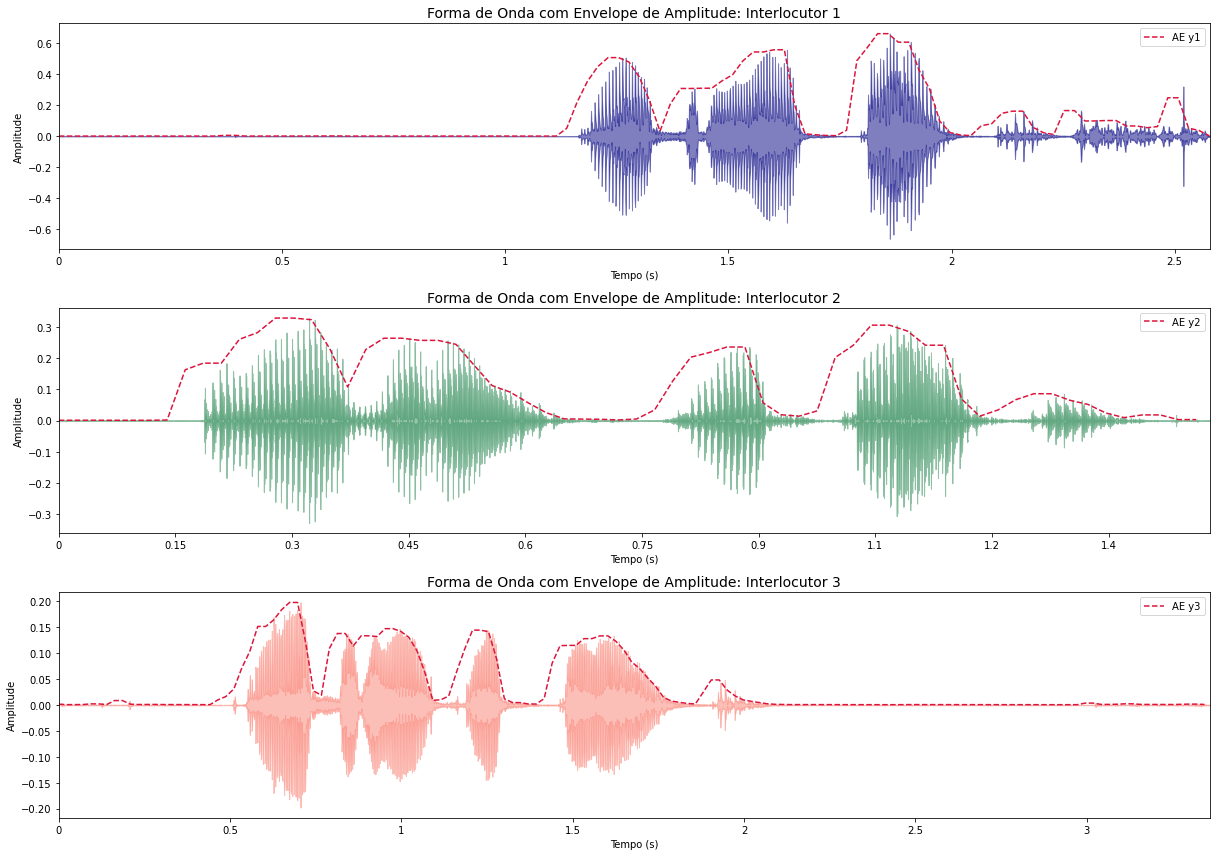

In [77]:
# Calculando AE para os sinais de áudio
ae_y1 = amplitude_envelope(signal=y1, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
ae_y2 = amplitude_envelope(signal=y2, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
ae_y3 = amplitude_envelope(signal=y3, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)

# Criando figura de plotagem
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 12))

# Plotando ondas e envelope de amplitude
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0], color=COLORS[0], alpha=.5)
t1 = librosa.frames_to_time(range(0, len(ae_y1)), hop_length=HOP_LENGTH)
axs[0].plot(t1, ae_y1, color='crimson', linestyle='--', label='AE y1')

ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1], color=COLORS[1], alpha=.5)
t2 = librosa.frames_to_time(range(0, len(ae_y2)), hop_length=HOP_LENGTH)
axs[1].plot(t2, ae_y2, color='crimson', linestyle='--', label='AE y2')

ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2], color=COLORS[2], alpha=.5)
t3 = librosa.frames_to_time(range(0, len(ae_y3)), hop_length=HOP_LENGTH)
axs[2].plot(t3, ae_y3, color='crimson', linestyle='--', label='AE y3')


# Customizando plotagem
for ax, i in zip(axs, range(1, 4)):
    ax.set_title(f'Forma de Onda com Envelope de Amplitude: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude') 
    ax.legend()

plt.tight_layout()

### Root Mean Squared Energy

A energia média quadrática de um sinal (ou RMS Energy), intuitivamente, é calculada a partir da energia média das amostras presentes em cada frame de um sinal de áudio. Neste conceito, o fator primordial a ser definido é o cálculo da energia do sinal, sendo este dado pela amplitude ao quadrado:

$$E_k = s(k)²$$

Dessa forma, é possível definir a energia média quadrática de um sinal por:

$$RMS_t = \sqrt{\frac{1}{K}\sum^{(t+1)K-1}_{k=t.K}s(k)²}$$

Onde é possível observar os mesmos elementos de índice do cálculo do envelope de amplitude, evidenciando assim que a energia média quadrática também é uma função aplicada as amostras de áudio presentes em um frame $t$, resultando assim em um array com número de elementos proporcional ao tamanho do frame (`frame_size`) e a variável de deslocamento (`hop_length`) definidos previamente.

Entre as características práticas do cálcuo da energia quadrática média, é possível citar:

* _Indicador de altura do som_
* _Menos sensível a outliers em relação ao envelope de amplitude_
* _Pode ser utilizada na segmentação de áudios (eventos/interlocutores) e classificação de gênero musical_

Felizmente, a biblioteca `librosa` possui a função nativa `librosa.feature.rms` capaz de calcular a energia média quadrática. No bloco a seguir, essa função será aplicada e seu resultado visualizado juntamente com os sinais de áudio utilizados na exploração.

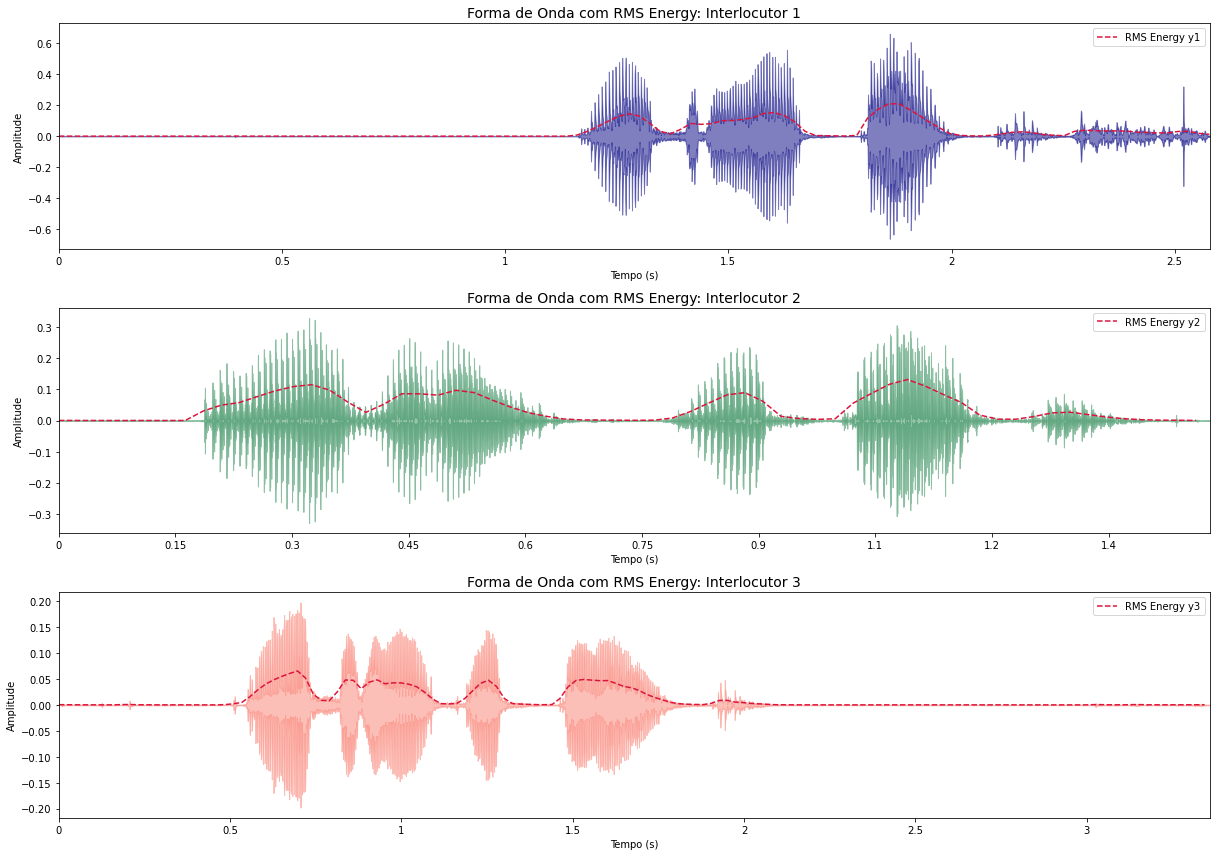

In [83]:
# Retornando rms para cada sinal
rms_y1 = librosa.feature.rms(y1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_y2 = librosa.feature.rms(y2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_y3 = librosa.feature.rms(y3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

# Criando figura de plotagem
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 12))

# Plotando ondas e envelope de amplitude
ld.waveplot(y=y1, sr=SAMPLE_RATE, ax=axs[0], color=COLORS[0], alpha=.5)
t1 = librosa.frames_to_time(range(0, len(ae_y1)), hop_length=HOP_LENGTH)
axs[0].plot(t1, rms_y1, color='crimson', linestyle='--', label='RMS Energy y1')

ld.waveplot(y=y2, sr=SAMPLE_RATE, ax=axs[1], color=COLORS[1], alpha=.5)
t2 = librosa.frames_to_time(range(0, len(ae_y2)), hop_length=HOP_LENGTH)
axs[1].plot(t2, rms_y2, color='crimson', linestyle='--', label='RMS Energy y2')

ld.waveplot(y=y3, sr=SAMPLE_RATE, ax=axs[2], color=COLORS[2], alpha=.5)
t3 = librosa.frames_to_time(range(0, len(ae_y3)), hop_length=HOP_LENGTH)
axs[2].plot(t3, rms_y3, color='crimson', linestyle='--', label='RMS Energy y3')


# Customizando plotagem
for ax, i in zip(axs, range(1, 4)):
    ax.set_title(f'Forma de Onda com RMS Energy: Interlocutor {i}', size=14)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude') 
    ax.legend()

plt.tight_layout()

### Zero Crossing Rate

A feature Zero Crossing Rate (ou ZCR) também possui uma explicação intuitiva ligada ao próprio nome: trata-se de um parâmetro calculado através da quantidade de vezes que o sinal "cruza" o eixo horizontal (zero). Com ele, é possível ter uma ideia de oscilação e definição de sons percursivos ou ruídos. Matematicamente, seu cálculo se dá por:

$$ZCR_t = \frac{1}{2} \sum^{(t+1)K-1}_{k-tK} |sgn(s(k)) - sgn(s(k+1))|$$

Onde a função $sgn(s(k))$ refere-se ao sinal da amostra $k$ dentro do frame $t$. Os termos $sgn(s(k)) - sgn(s(k+1))$ indicam uma comparação entre o sinal da amostra $k$ e o sinal da amostra $k+1$ subsequente, trazendo assim a ideia de verificação se o sinal realmente "cruzou" o eixo zero horizontal.

Entre as características da feature ZCR, pode-se citar:

* _Reconhecimento de sons percursivos ou com pitch_
* _Estimativa de pitch monofônicos_
* _Decisões de voz/silêncio para sinais de voz falados_

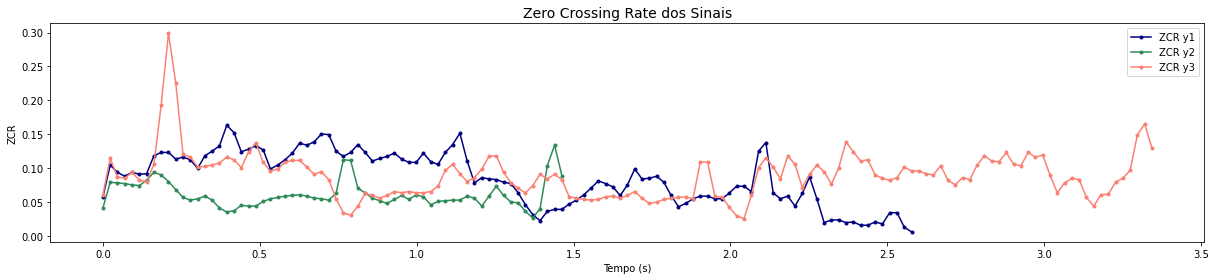

In [103]:
# Retornando zcr para cada sinal
zcr_y1 = librosa.feature.zero_crossing_rate(y1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_y2 = librosa.feature.zero_crossing_rate(y2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_y3 = librosa.feature.zero_crossing_rate(y3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

# Criando figura de plotagem
fig, ax = plt.subplots(figsize=(17, 4))

# Plotando ondas e envelope de amplitude
t1 = librosa.frames_to_time(range(0, len(ae_y1)), hop_length=HOP_LENGTH)
ax.plot(t1, zcr_y1, color=COLORS[0], marker='o', markersize=3, linestyle='-', label='ZCR y1')

t2 = librosa.frames_to_time(range(0, len(ae_y2)), hop_length=HOP_LENGTH)
ax.plot(t2, zcr_y2, color=COLORS[1], marker='o', markersize=3,  linestyle='-', label='ZCR y2')

t3 = librosa.frames_to_time(range(0, len(ae_y3)), hop_length=HOP_LENGTH)
ax.plot(t3, zcr_y3, color=COLORS[2], marker='o', markersize=3, linestyle='-', label='ZCR y3')


# Customizando plotagem
ax.set_title(f'Zero Crossing Rate dos Sinais', size=14)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('ZCR')
ax.legend()

plt.tight_layout()